<a href="https://colab.research.google.com/github/caro-vergara-tamara/where-to-live/blob/main/read_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import geopandas as gpd
import fiona
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from typing import Tuple, Dict

In [2]:
from preparing_data.immo_preprocessing import select_and_rename_immo_columns
from preparing_data.immo_preprocessing import add_geo_info
from preparing_data.immo_preprocessing import backfill_geo_from_cd_stat_sector
from preparing_data.immo_preprocessing import fill_hierarchy_by_type

In [3]:
# help(select_and_rename_immo_columns)

Help on function select_and_rename_immo_columns in module preparing_data.immo_preprocessing:

select_and_rename_immo_columns(df)
    Selects relevant columns for the immo dataset and renames them to snake_case.



In [7]:
# Import immo database
immo = pd.read_excel('data/TF_IMMO_SECTOR.xlsx', engine='openpyxl')
# immo.columns

In [8]:
immo = select_and_rename_immo_columns(immo)

In [6]:
# immo.columns # good good good

Index(['cd_stat_sector', 'cd_year', 'cd_type', 'CD_TYPE_FR', 'n', 'p25', 'p50',
       'p75', 'p10', 'p90'],
      dtype='object')

In [9]:
immo, diagnostics  = add_geo_info(immo)

In [10]:
 #diagnostics

{'immo_rows_before': 456849,
 'rows_after_merge': 456849,
 'geo_unique_keys': 19795,
 'geo_duplicates_dropped': 0,
 'unmatched_keys_count': 10034,
 'unmatched_keys_pct': 2.196,
 'unmatched_sample': ['11001_UNKNOWN',
  '11002J81-',
  '11002J901',
  '11002J912',
  '11002J923',
  '11002J932',
  '11002J94-',
  '11002P21-',
  '11002Q2PA',
  '11002_UNKNOWN']}

In [ ]:
# immo.isnull().sum()          

In [10]:
# immo.columns

Index(['cd_stat_sector', 'cd_year', 'cd_type', 'CD_TYPE_FR', 'n', 'p25', 'p50',
       'p75', 'p10', 'p90', 'cd_sub_munty', 'cd_munty_refnis',
       'cd_dstr_refnis', 'cd_prov_refnis', 'cd_rgn_refnis'],
      dtype='object')

In [11]:
# Or let it load from parquet path:
full_db, diag = backfill_geo_from_cd_stat_sector(immo)

print(diag)
# Quick check that row count is preserved
assert diag["shape_unchanged"], "Row count changed unexpectedly."

{'rows_total': 456849, 'initial_missing_sub_munty': 10034, 'suspicious_rows': 119, 'unknown_rows': 9915, 'remaining_missing_sub_munty': 10034, 'unresolved_key_samples': ['11002J81-', '11002J901', '11002J912', '11002J923', '11002J932', '11002J94-', '11002P21-', '11002Q2PA', '52043A10-', '52043B01-', '52063A372', '62108F09-', '62108F19-', '11001_UNKNOWN', '11002_UNKNOWN'], 'shape_unchanged': True}


In [12]:
immo = full_db 

In [13]:
# immo.isnull().sum()    

cd_stat_sector          0
cd_year                 0
cd_type                 0
CD_TYPE_FR              0
n                       0
p25                429771
p50                429771
p75                429771
p10                429771
p90                429771
cd_sub_munty        10034
cd_munty_refnis         0
cd_dstr_refnis          0
cd_prov_refnis          0
cd_rgn_refnis       10034
dtype: int64

In [14]:
# I want to check if there's a particular year that has more missing information than other, 
immo.groupby("cd_year").apply(lambda x: x.isnull().sum())

# The previous years tend to have more missing data

C:\Users\carol\AppData\Local\Temp\ipykernel_14616\1911690162.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  immo.groupby("cd_year").apply(lambda x: x.isnull().sum())


,cd_stat_sector,cd_year,cd_type,CD_TYPE_FR,n,p25,p50,p75,p10,p90,cd_sub_munty,cd_munty_refnis,cd_dstr_refnis,cd_prov_refnis,cd_rgn_refnis
cd_year,,,,,,,,,,,,,,,
2013,0,0,0,0,0,37355,37355,37355,37355,37355,1802,0,0,0,1802
2014,0,0,0,0,0,38534,38534,38534,38534,38534,1812,0,0,0,1812
2015,0,0,0,0,0,38164,38164,38164,38164,38164,1277,0,0,0,1277
2016,0,0,0,0,0,38628,38628,38628,38628,38628,763,0,0,0,763
2017,0,0,0,0,0,38933,38933,38933,38933,38933,669,0,0,0,669
2018,0,0,0,0,0,39681,39681,39681,39681,39681,658,0,0,0,658
2019,0,0,0,0,0,39499,39499,39499,39499,39499,643,0,0,0,643
2020,0,0,0,0,0,39493,39493,39493,39493,39493,543,0,0,0,543
2021,0,0,0,0,0,39901,39901,39901,39901,39901,681,0,0,0,681


In [15]:
immo.groupby('cd_type')["CD_TYPE_FR"].unique()

cd_type
B001    [Maisons avec 2 ou 3 façades (type fermé + typ...
B002    [Maisons avec 4 ou plus de façades (type ouvert)]
B00A    [Toutes les maisons avec 2, 3, 4 ou plus de fa...
B015                                       [Appartements]
Name: CD_TYPE_FR, dtype: object

In [16]:
df = immo.groupby(['cd_type', "cd_year"])["p50"].mean().reset_index()

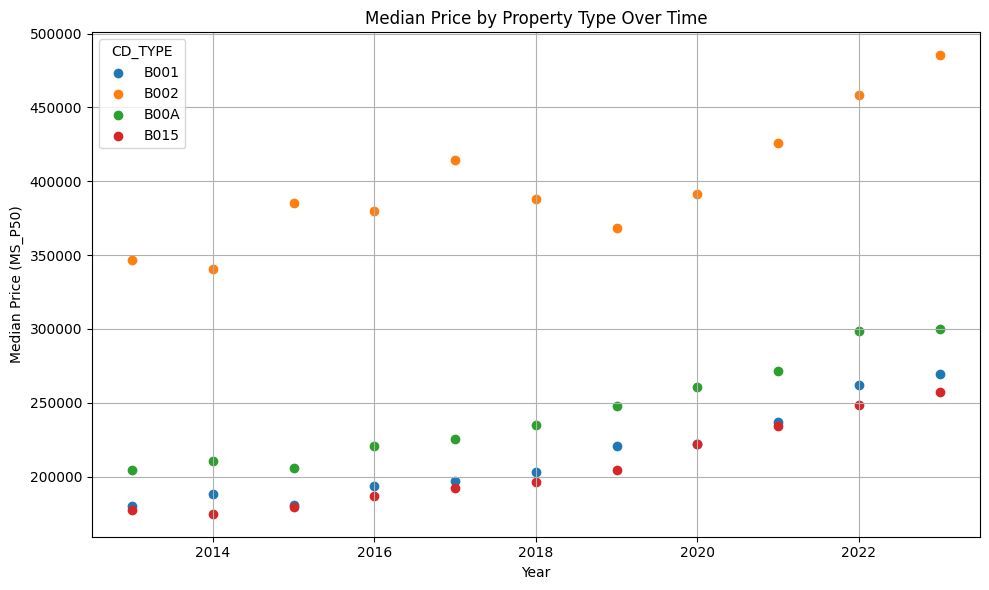

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for cd_type, group in df.groupby('cd_type'):
    plt.scatter(group['cd_year'], group['p50'], label=cd_type)

plt.xlabel("Year")
plt.ylabel("Median Price (MS_P50)")
plt.title("Median Price by Property Type Over Time")
plt.legend(title="CD_TYPE")
plt.grid(True)
plt.tight_layout()
plt.show()


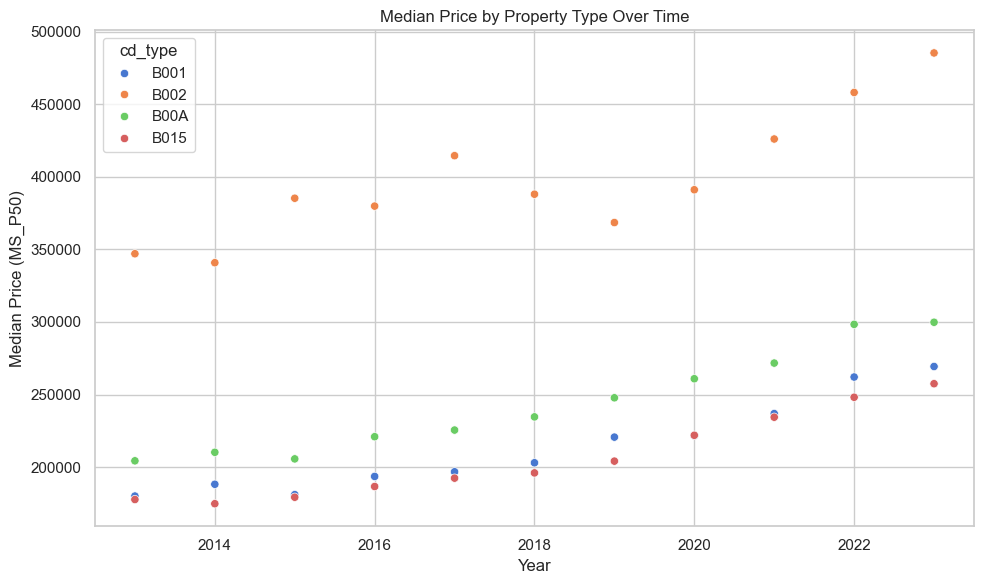

In [18]:
# trying a different library hehe 
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid", palette="muted")
sns.scatterplot(data=df, x='cd_year', y='p50', hue='cd_type')

plt.xlabel("Year")
plt.ylabel("Median Price (MS_P50)")
plt.title("Median Price by Property Type Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
immo_original = immo
for pct in ['p10', 'p25', 'p50', 'p75', 'p90']:
    immo = fill_hierarchy_by_type(immo, pct)

In [20]:
immo.isnull().sum()

cd_stat_sector         0
cd_year                0
cd_type                0
CD_TYPE_FR             0
n                      0
p25                    0
p50                    0
p75                    0
p10                    0
p90                    0
cd_sub_munty       10034
cd_munty_refnis        0
cd_dstr_refnis         0
cd_prov_refnis         0
cd_rgn_refnis      10034
dtype: int64

In [ ]:
# Making some geo_visualizations 

In [27]:
import pandas as pd
import geopandas as gpd
import fiona

# Last 2024 ----
layers_2024 = fiona.listlayers("data/sh_statbel_statistical_sectors_3812_20240101/sh_statbel_statistical_sectors_3812_20240101.sqlite")
print("Available layers 2024:", layers_2024)

# Load one of the layers
gdf_2024 = gpd.read_file("data/sh_statbel_statistical_sectors_3812_20240101/sh_statbel_statistical_sectors_3812_20240101.sqlite", layer=layers_2024[0])  # or manually specify: layer="my_layer_name"
gdf_2024.head()

# Index(['ogc_fid0', 'cd_sector', 'tx_sector_descr_nl', 'tx_sector_descr_fr',
#        'tx_sector_descr_de', 'cd_sub_munty', 'tx_sub_munty_nl',
#        'tx_sub_munty_fr', 'tx_munty_dstr', 'cd_munty_refnis',
#        'tx_munty_descr_nl', 'tx_munty_descr_fr', 'tx_munty_descr_de',
#        'cd_dstr_refnis', 'tx_adm_dstr_descr_nl', 'tx_adm_dstr_descr_fr',
#        'tx_adm_dstr_descr_de', 'cd_prov_refnis', 'tx_prov_descr_nl',
#        'tx_prov_descr_fr', 'tx_prov_descr_de', 'cd_rgn_refnis',
#        'tx_rgn_descr_nl', 'tx_rgn_descr_fr', 'tx_rgn_descr_de', 'cd_country',
#        'cd_nuts_lvl1', 'cd_nuts_lvl2', 'cd_nuts_lvl3', 'ms_area_ha',
#        'ms_perimeter_m', 'dt_situation', 'geometry'],
#       dtype='object')

immo.columns
# Index(['cd_stat_sector', 'cd_year', 'cd_type', 'CD_TYPE_FR', 'n', 'p25', 'p50',
#        'p75', 'p10', 'p90', 'cd_sub_munty', 'cd_munty_refnis',
#        'cd_dstr_refnis', 'cd_prov_refnis', 'cd_rgn_refnis'],
#       dtype='object')


# immo_map = immo.merge(gdf_2024, how="left",   
#                       left_on="cd_stat_sector",   
#                       right_on="cd_sector")


Available layers 2024: ['sh_statbel_statistical_sectors_3812_20240101']


Index(['cd_stat_sector', 'cd_year', 'cd_type', 'CD_TYPE_FR', 'n', 'p25', 'p50',
       'p75', 'p10', 'p90', 'cd_sub_munty', 'cd_munty_refnis',
       'cd_dstr_refnis', 'cd_prov_refnis', 'cd_rgn_refnis'],
      dtype='object')

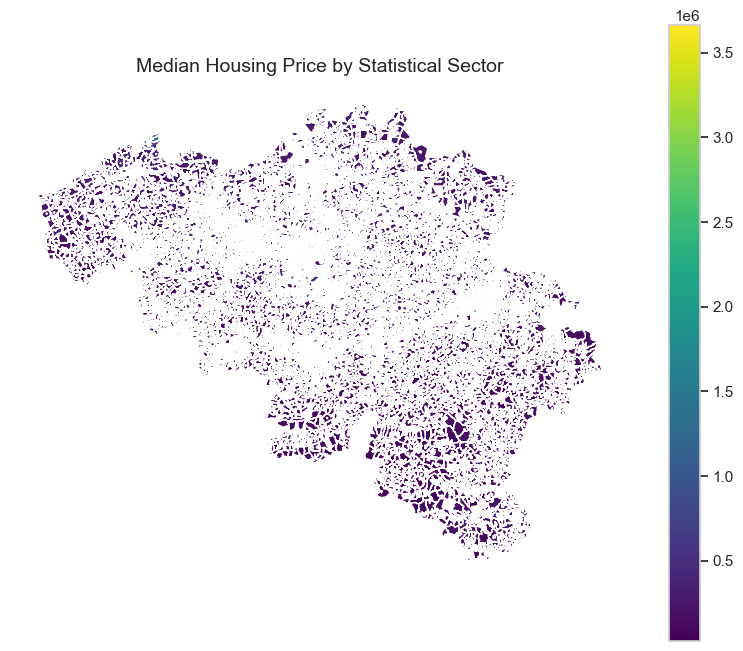

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Make sure geometry is available by merging
immo_map = immo.merge(
    gdf_2024.rename(columns={"cd_sector": "cd_stat_sector"}),
    on="cd_stat_sector",
    how="left"
)

# 2. Convert to GeoDataFrame (geometry column comes from gdf_2024)
immo_map = gpd.GeoDataFrame(immo_map, geometry="geometry", crs=gdf_2024.crs)

# 3. Simple choropleth plot
immo_map.plot(
    column="p50",         # median price
    cmap="viridis",       # color palette
    legend=True,
    figsize=(10, 8)
)

plt.title("Median Housing Price by Statistical Sector", fontsize=14)
plt.axis("off")
plt.show()


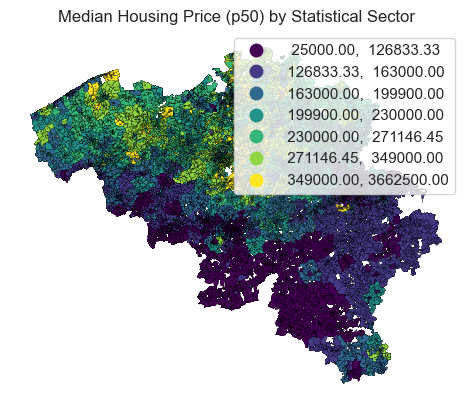

In [31]:
import mapclassify as mc
ax = immo_map.plot(
    column="p50",
    scheme="Quantiles",  # capital Q ok too
    k=7,                 # 5–9 classes is typical
    cmap="viridis",
    legend=True,
    edgecolor="black",
    linewidth=0.1,
    missing_kwds={"color":"lightgrey","hatch":"///","label":"No data"}
)
ax.set_title("Median Housing Price (p50) by Statistical Sector")
ax.set_axis_off()


In [21]:
# immo.columns

Index(['cd_stat_sector', 'cd_year', 'cd_type', 'CD_TYPE_FR', 'n', 'p25', 'p50',
       'p75', 'p10', 'p90', 'cd_sub_munty', 'cd_munty_refnis',
       'cd_dstr_refnis', 'cd_prov_refnis', 'cd_rgn_refnis'],
      dtype='object')

In [26]:
# immo.head

<bound method NDFrame.head of        cd_stat_sector  cd_year cd_type  \
0           11001A00-     2013    B001   
1           11001A00-     2014    B001   
2           11001A00-     2015    B001   
3           11001A00-     2016    B001   
4           11001A00-     2017    B001   
...               ...      ...     ...   
456844  93090_UNKNOWN     2013    B00A   
456845  93090_UNKNOWN     2014    B00A   
456846  93090_UNKNOWN     2015    B00A   
456847  93090_UNKNOWN     2016    B00A   
456848  93090_UNKNOWN     2021    B00A   

                                               CD_TYPE_FR   n            p25  \
0       Maisons avec 2 ou 3 façades (type fermé + type...  17  190000.000000   
1       Maisons avec 2 ou 3 façades (type fermé + type...  20  197500.000000   
2       Maisons avec 2 ou 3 façades (type fermé + type...  14  272556.818182   
3       Maisons avec 2 ou 3 façades (type fermé + type...  16  272556.818182   
4       Maisons avec 2 ou 3 façades (type fermé + type...  20  24

In [27]:
# immo_.head

<bound method NDFrame.head of        cd_stat_sector  cd_year cd_type  \
0           11001A00-     2013    B001   
1           11001A00-     2014    B001   
2           11001A00-     2015    B001   
3           11001A00-     2016    B001   
4           11001A00-     2017    B001   
...               ...      ...     ...   
456844  93090_UNKNOWN     2013    B00A   
456845  93090_UNKNOWN     2014    B00A   
456846  93090_UNKNOWN     2015    B00A   
456847  93090_UNKNOWN     2016    B00A   
456848  93090_UNKNOWN     2021    B00A   

                                               CD_TYPE_FR   n       p25  \
0       Maisons avec 2 ou 3 façades (type fermé + type...  17  190000.0   
1       Maisons avec 2 ou 3 façades (type fermé + type...  20  197500.0   
2       Maisons avec 2 ou 3 façades (type fermé + type...  14       NaN   
3       Maisons avec 2 ou 3 façades (type fermé + type...  16       NaN   
4       Maisons avec 2 ou 3 façades (type fermé + type...  20  240000.0   
...            

In [78]:
# Craeting synthetic real satate sales based on the information of Statbel
synthetic_df = expand_to_synthetic_transactions(immo)

In [79]:
synthetic_df.sample(6)

,cd_stat_sector,cd_year,cd_type,price,source
36381,11002Q012,2020,B00A,186797.428692,synthetic
438511,38014A11-,2021,B015,124687.709683,synthetic
1891,11002A00-,2023,B015,808139.248254,synthetic
584751,52011E50-,2016,B00A,129382.523025,synthetic
601655,53028A012,2023,B00A,82558.620477,synthetic
538705,44021M01-,2014,B00A,202473.717122,synthetic


In [80]:
db = synthetic_df

In [ ]:
####################################### 
#########################
# HERE WE WILL MAKE THE GEO PLOTS 

In [82]:
# Now we make geo plots
# before we used by NIS9, which is more granular, buuutttt not the data on which we did the transformations 
db.head()
db = db.rename({"cd_stat_sector": "cd_sector"}, axis='columns')
immo_nis9 = gdf_2024.merge(db, how="left", on="cd_sector")


NameError: name 'gdf_2024' is not defined

In [89]:
cleaned_db = db.dropna()
db = db.rename({"CD_STAT_SECTOR": "cd_sector"}, axis='columns')



In [6]:
immo_2023 = immo[(immo['CD_YEAR'] == 2023) & (immo['CD_TYPE'] == 'B00A')]
immo_2023.head()

cleaned_immo_2023 = immo_2023.dropna()
cleaned_immo_2023.head()
unique_values = cleaned_immo_2023['CD_STAT_SECTOR'].unique()
unique_values
len(pd.unique(cleaned_immo_2023['CD_STAT_SECTOR']))

939

In [ ]:
immo_2023

,CD_STAT_SECTOR,CD_YEAR,CD_TYPE,CD_TYPE_NL,CD_TYPE_FR,MS_TRANSACTIONS,MS_P25,MS_P50 (MEDIAN_PRICE),MS_P75,MS_P10,MS_P90
27,11001A00-,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",12,NaN,NaN,NaN,NaN,NaN
71,11001A01-,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",33,347000.0,422000.0,580000.0,296500.0,680000.0
115,11001A020,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",9,NaN,NaN,NaN,NaN,NaN
148,11001A030,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",4,NaN,NaN,NaN,NaN,NaN
181,11001A042,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
456721,93090G032,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",3,NaN,NaN,NaN,NaN,NaN
456735,93090G043,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",2,NaN,NaN,NaN,NaN,NaN
456762,93090G091,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",1,NaN,NaN,NaN,NaN,NaN
456787,93090G191,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",1,NaN,NaN,NaN,NaN,NaN


In [ ]:
immo_2023 = immo_2023.rename({"CD_STAT_SECTOR": "cd_sector"}, axis='columns')
immo_2023.head()

,cd_sector,CD_YEAR,CD_TYPE,CD_TYPE_NL,CD_TYPE_FR,MS_TRANSACTIONS,MS_P25,MS_P50 (MEDIAN_PRICE),MS_P75,MS_P10,MS_P90
27,11001A00-,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",12,NaN,NaN,NaN,NaN,NaN
71,11001A01-,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",33,347000.0,422000.0,580000.0,296500.0,680000.0
115,11001A020,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",9,NaN,NaN,NaN,NaN,NaN
148,11001A030,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",4,NaN,NaN,NaN,NaN,NaN
181,11001A042,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",5,NaN,NaN,NaN,NaN,NaN


<Axes: >

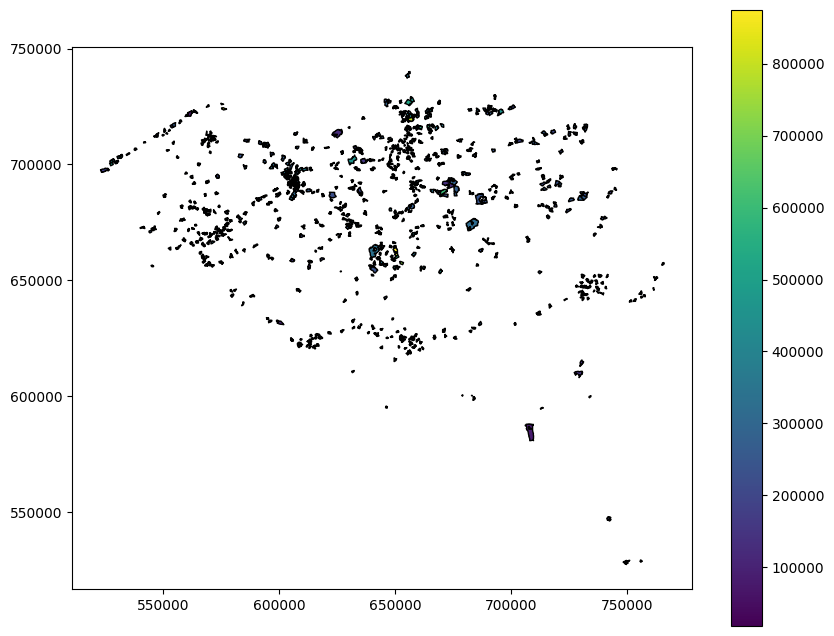

In [ ]:
immo_nis9 = gdf_2024.merge(immo_2023, how="left", on="cd_sector")


# Simple choropleth plot
immo_nis9.plot(column="MS_P25",
         cmap="viridis",
         legend=True,
         figsize=(10, 8),
         edgecolor="black")

In [ ]:
immo_nis7 = immo_nis7[(immo_nis7['CD_YEAR'] == 2023) & (immo_nis7['CD_TYPE'] == 'B00A')]
immo_nis7.head()


,CD_WIJK_QUARTIER,CD_YEAR,CD_TYPE,CD_TYPE_NL,CD_TYPE_FR,MS_TRANSACTIONS,MS_P25,MS_P50 (MEDIAN_PRICE),MS_P75
32,11001A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",96,355000.0,417400.0,555000.0
76,11001A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",16,331250.0,387500.0,445000.0
119,11001A2,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",28,339500.0,392250.0,497500.0
171,11002A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",11,NaN,NaN,NaN
204,11002A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",23,322500.0,444500.0,565000.0


In [ ]:
# Cleaned Database at NIS7
cleaned_immo_nis7 = immo_nis7.dropna()
cleaned_immo_nis7.head()
unique_values = cleaned_immo_nis7['CD_WIJK_QUARTIER'].unique()
unique_values
len(pd.unique(cleaned_immo_nis7['CD_WIJK_QUARTIER']))


1673

In [ ]:
immo_nis7.head()

,CD_WIJK_QUARTIER,CD_YEAR,CD_TYPE,CD_TYPE_NL,CD_TYPE_FR,MS_TRANSACTIONS,MS_P25,MS_P50 (MEDIAN_PRICE),MS_P75
32,11001A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",96,355000.0,417400.0,555000.0
76,11001A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",16,331250.0,387500.0,445000.0
119,11001A2,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",28,339500.0,392250.0,497500.0
171,11002A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",11,NaN,NaN,NaN
204,11002A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",23,322500.0,444500.0,565000.0


In [ ]:
brussels_zones = ["BRUXELLES PENTAGONE",
                  "BRUXELLES-CHAUSSEE D'ANVERS",
                  "BRUXELLES-HAREN",
                  "BRUXELLES-LAEKEN",
                  "BRUXELLES-LOUISE",
                  "BRUXELLES-NEDER-OVERHEEMBEEK",
                  "BRUXELLES-RUE DE LA LOI"
                  ]

filtered = gdf_2024[gdf_2024["tx_sub_munty_fr"].isin(brussels_zones)]
filtered



,ogc_fid0,cd_sector,tx_sector_descr_nl,tx_sector_descr_fr,tx_sector_descr_de,cd_sub_munty,tx_sub_munty_nl,tx_sub_munty_fr,tx_munty_dstr,cd_munty_refnis,...,tx_rgn_descr_fr,tx_rgn_descr_de,cd_country,cd_nuts_lvl1,cd_nuts_lvl2,cd_nuts_lvl3,ms_area_ha,ms_perimeter_m,dt_situation,geometry
2130,2131,21004A001,GROTE MARKT,GRAND-PLACE,GRAND-PLACE,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,10.775006,1421.0,2024-01-01,"MULTIPOLYGON (((648991.628 670692.468, 649015...."
2131,2132,21004A002,BEURS,BOURSE,BOURSE,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,3.951623,877.0,2024-01-01,"MULTIPOLYGON (((648801.873 670883.21, 648751.8..."
2132,2133,21004A01-,OUD KORENHUIS,VIEILLE HALLE AUX BLES,VIEILLE HALLE AUX BLES,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,9.002431,1252.0,2024-01-01,"MULTIPOLYGON (((648996.436 670340.831, 648966...."
2133,2134,21004A02-,SINT-FRANCISCUS XAVERIUS,SAINT-FRANCOIS XAVIER,SAINT-FRANCOIS XAVIER,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,13.650586,2097.0,2024-01-01,"MULTIPOLYGON (((648808.561 670221.841, 648730...."
2134,2135,21004A03-,BIJSTAND - ZUID PALEIS,BON SECOURS - PALAIS DU MIDI,BON SECOURS - PALAIS DU MIDI,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,10.525579,2187.0,2024-01-01,"MULTIPOLYGON (((648652.857 670630.631, 648600...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,2233,21004G310,HAREN-ZUIDWEST,HAREN-SUD-OUEST,HAREN-SUD-OUEST,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,30.772596,3864.0,2024-01-01,"MULTIPOLYGON (((653621.794 675417.81, 653580.2..."
2233,2234,21004G321,HAREN-OOST,HAREN-EST,HAREN-EST,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,29.513899,2353.0,2024-01-01,"MULTIPOLYGON (((654321.725 675145.835, 654304...."
2234,2235,21004G371,VORMINGSSTATION,GARE DE FORMATION,GARE DE FORMATION,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,207.856227,8011.0,2024-01-01,"MULTIPOLYGON (((653302.2 677311.682, 653302.93..."
2235,2236,21004G3MJ,DOBBELENBERG,DOBBELENBERG,DOBBELENBERG,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,65.919884,5423.0,2024-01-01,"MULTIPOLYGON (((653908.417 676849.688, 653913...."


In [ ]:
filtered = gdf_2024[gdf_2024["cd_munty_refnis"]== '21004'] # same same
filtered


,ogc_fid0,cd_sector,tx_sector_descr_nl,tx_sector_descr_fr,tx_sector_descr_de,cd_sub_munty,tx_sub_munty_nl,tx_sub_munty_fr,tx_munty_dstr,cd_munty_refnis,...,tx_rgn_descr_fr,tx_rgn_descr_de,cd_country,cd_nuts_lvl1,cd_nuts_lvl2,cd_nuts_lvl3,ms_area_ha,ms_perimeter_m,dt_situation,geometry
2130,2131,21004A001,GROTE MARKT,GRAND-PLACE,GRAND-PLACE,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,10.775006,1421.0,2024-01-01,"MULTIPOLYGON (((648991.628 670692.468, 649015...."
2131,2132,21004A002,BEURS,BOURSE,BOURSE,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,3.951623,877.0,2024-01-01,"MULTIPOLYGON (((648801.873 670883.21, 648751.8..."
2132,2133,21004A01-,OUD KORENHUIS,VIEILLE HALLE AUX BLES,VIEILLE HALLE AUX BLES,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,9.002431,1252.0,2024-01-01,"MULTIPOLYGON (((648996.436 670340.831, 648966...."
2133,2134,21004A02-,SINT-FRANCISCUS XAVERIUS,SAINT-FRANCOIS XAVIER,SAINT-FRANCOIS XAVIER,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,13.650586,2097.0,2024-01-01,"MULTIPOLYGON (((648808.561 670221.841, 648730...."
2134,2135,21004A03-,BIJSTAND - ZUID PALEIS,BON SECOURS - PALAIS DU MIDI,BON SECOURS - PALAIS DU MIDI,21004A,BRUSSEL PENTAGOON,BRUXELLES PENTAGONE,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,10.525579,2187.0,2024-01-01,"MULTIPOLYGON (((648652.857 670630.631, 648600...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,2233,21004G310,HAREN-ZUIDWEST,HAREN-SUD-OUEST,HAREN-SUD-OUEST,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,30.772596,3864.0,2024-01-01,"MULTIPOLYGON (((653621.794 675417.81, 653580.2..."
2233,2234,21004G321,HAREN-OOST,HAREN-EST,HAREN-EST,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,29.513899,2353.0,2024-01-01,"MULTIPOLYGON (((654321.725 675145.835, 654304...."
2234,2235,21004G371,VORMINGSSTATION,GARE DE FORMATION,GARE DE FORMATION,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,207.856227,8011.0,2024-01-01,"MULTIPOLYGON (((653302.2 677311.682, 653302.93..."
2235,2236,21004G3MJ,DOBBELENBERG,DOBBELENBERG,DOBBELENBERG,21004G,BRUSSEL-HAREN,BRUXELLES-HAREN,None,21004,...,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,65.919884,5423.0,2024-01-01,"MULTIPOLYGON (((653908.417 676849.688, 653913...."


In [ ]:
gdf_2024["test"] = gdf_2024["cd_munty_refnis"].str[:4]

gdf_2024[gdf_2024["test"] == "2100"]


,ogc_fid0,cd_sector,tx_sector_descr_nl,tx_sector_descr_fr,tx_sector_descr_de,cd_sub_munty,tx_sub_munty_nl,tx_sub_munty_fr,tx_munty_dstr,cd_munty_refnis,...,tx_rgn_descr_de,cd_country,cd_nuts_lvl1,cd_nuts_lvl2,cd_nuts_lvl3,ms_area_ha,ms_perimeter_m,dt_situation,geometry,test
1997,1998,21001A00-,VERZET,RESISTANCE,RESISTANCE,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,None,21001,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,12.514422,1730.0,2024-01-01,"MULTIPOLYGON (((646124.965 669525.05, 646121.8...",2100
1998,1999,21001A011,KLEINMOLEN,KLEINMOLEN,KLEINMOLEN,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,None,21001,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,17.884033,1952.0,2024-01-01,"MULTIPOLYGON (((646420.588 669763.826, 646471....",2100
1999,2000,21001A02-,WAYEZ,WAYEZ,WAYEZ,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,None,21001,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,3.875365,1680.0,2024-01-01,"MULTIPOLYGON (((646389.25 669587.589, 646389.2...",2100
2000,2001,21001A031,RAUTER-ZUID,RAUTER-SUD,RAUTER-SUD,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,None,21001,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,10.893589,1539.0,2024-01-01,"MULTIPOLYGON (((645888.307 669013.456, 645848....",2100
2001,2002,21001A041,VEEWEIDE-ZUID,VEEWEYDE-SUD,VEEWEYDE-SUD,21001A,ANDERLECHT-CENTRUM,ANDERLECHT-CENTRE,None,21001,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,15.746192,1693.0,2024-01-01,"MULTIPOLYGON (((645327.682 669178.466, 645331....",2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,2391,21009A82-,WOUD,FORET,FORET,21009A,ELSENE,IXELLES,None,21009,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,14.276074,1625.0,2024-01-01,"MULTIPOLYGON (((651840.045 665959.455, 651716....",2100
2391,2392,21009A83-,L. ERNOTTESTRAAT,L. ERNOTTE (RUE),L. ERNOTTE (RUE),21009A,ELSENE,IXELLES,None,21009,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,9.727913,1924.0,2024-01-01,"MULTIPOLYGON (((652013.862 666259.483, 652013....",2100
2392,2393,21009A90-,SINT-FILIPPUS,SAINT-PHILIPPE DE NERI,SAINT-PHILIPPE DE NERI,21009A,ELSENE,IXELLES,None,21009,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,13.787527,1603.0,2024-01-01,"MULTIPOLYGON (((650882.566 668073.074, 650890....",2100
2393,2394,21009A911,A. DELPORTE-ZUID,A. DELPORTE-SUD,A. DELPORTE-SUD,21009A,ELSENE,IXELLES,None,21009,...,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,7.887527,1375.0,2024-01-01,"MULTIPOLYGON (((651245.902 667853.744, 651215....",2100


In [ ]:
# # Add hierarchy levels
# immo_nis7['L0'] = immo_nis7['CD_WIJK_QUARTIER'].str[:4]   # e.g. 1100
# immo_nis7['L1'] = immo_nis7['CD_WIJK_QUARTIER'].str[:5]   # e.g. 11001
# immo_nis7['L2'] = immo_nis7['CD_WIJK_QUARTIER'].str[:6]   # e.g. 11001A
# immo_nis7['L3'] = immo_nis7['CD_WIJK_QUARTIER'].str[:7]   # e.g. 11001A0
# #immo_nis7['L4'] = immo_nis7['CD_WIJK_QUARTIER'].str[:8]   # e.g. 11001A00

# immo_nis7.columns = immo_nis7.columns.str.strip()  # Remove accidental spaces
# immo_nis7 = immo_nis7.rename({"MS_P50 (MEDIAN_PRICE)": "MS_P50"}, axis='columns')

# immo_nis7.head()


# # Apply to MS_P50, MS_P25, and MS_P75
# #for col in ['MS_P50', 'MS_P25', 'MS_P75']:
# #    immo_nis7[col] = pd.to_numeric(immo_nis7[col], errors='coerce')  # Ensure numeric
# #    immo_nis7 = fill_hierarchy(immo_nis7, col)

,CD_WIJK_QUARTIER,CD_YEAR,CD_TYPE,CD_TYPE_NL,CD_TYPE_FR,MS_TRANSACTIONS,MS_P25,MS_P50,MS_P75,L0,L1,L2,L3
32,11001A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",96,355000.0,417400.0,555000.0,1100,11001,11001A,11001A0
76,11001A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",16,331250.0,387500.0,445000.0,1100,11001,11001A,11001A1
119,11001A2,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",28,339500.0,392250.0,497500.0,1100,11001,11001A,11001A2
171,11002A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",11,NaN,NaN,NaN,1100,11002,11002A,11002A0
204,11002A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",23,322500.0,444500.0,565000.0,1100,11002,11002A,11002A1


In [ ]:
immo_nis7_bis.head()

,CD_WIJK_QUARTIER,CD_YEAR,CD_TYPE,CD_TYPE_NL,CD_TYPE_FR,MS_TRANSACTIONS,MS_P25,MS_P50,MS_P75,L0,L1,L2,L3
32,11001A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",96,355000.0,417400.0,555000.0,1100,11001,11001A,11001A0
76,11001A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",16,331250.0,387500.0,445000.0,1100,11001,11001A,11001A1
119,11001A2,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",28,339500.0,392250.0,497500.0,1100,11001,11001A,11001A2
171,11002A0,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",11,NaN,444500.0,NaN,1100,11002,11002A,11002A0
204,11002A1,2023,B00A,"Alle huizen met 2, 3, 4 of meer gevels (excl. ...","Toutes les maisons avec 2, 3, 4 ou plus de faç...",23,322500.0,444500.0,565000.0,1100,11002,11002A,11002A1


In [ ]:
#gdf_2024['L3'] = gdf_2024['cd_sector'].str[:7]
#gdf_2024.head()


In [ ]:
immo_nis7 = gdf_2024.merge(immo_nis7_bis, how="left", on="L3")


# Simple choropleth plot
immo_nis7.plot(column="MS_P50",
               cmap="viridis",
               legend=True,
               figsize=(10, 8),
               #edgecolor="black",
               vmin=150000,  # Lower bound of color scale
               vmax=800000   # Upper bound of color scale
               )


KeyError: 'L3'

In [ ]:
immo_nis7_bis["MS_P50"].mean()


np.float64(288269.5089632581)

In [ ]:
gdf = immo_nis7

# Identify columns with Timestamp objects
for col in gdf.columns:
    if gdf[col].apply(lambda x: isinstance(x, pd.Timestamp)).any():
        print(f"{col} contains timestamps")


gdf_clean = gdf.drop(columns=["dt_situation"])


dt_situation contains timestamps


In [ ]:
#import folium
#from folium import Choropleth
#
#
## Center map on average coordinates
#center = [gdf_clean.geometry.centroid.y.mean(), gdf_clean.geometry.centroid.x.mean()]
#
## Create map
#m = folium.Map(location=center, zoom_start=10, tiles="cartodbpositron")
#
## Add choropleth
#Choropleth(
#    geo_data=gdf_clean,
#    data=gdf_clean,
#    columns=["cd_sector", "MS_P50"],
#    key_on="feature.properties.cd_sector",
#    fill_color="YlOrRd",
#    fill_opacity=0.7,
#    line_opacity=0.2,
#    legend_name="Median Price (€)"
#).add_to(m)
#
## Display
#m

In [ ]:

# select the year 2022
income.loc[income['CD_YEAR'] ==2022]

income_clean = (
    income[income['CD_YEAR'] == 2022]  # filter
    .rename(columns={
        'CD_YEAR': 'year',
        'MS_NBR_NON_ZERO_INC': 'n_non_zero_inc', #Nombre de déclarations !zero
        'MS_NBR_ZERO_INC': 'n_zero_inc', #Nombre de déclarations zero
        'MS_TOT_NET_TAXABLE_INC': 'revenue_total_imposable',

        'MS_TOT_NET_INC': 'revenue_total_net',
        'MS_NBR_TOT_NET_INC': 'n_revenue_total_net',

        'MS_REAL_ESTATE_NET_INC': 'revenue_real_estate_net',
        'MS_NBR_REAL_ESTATE_NET_INC': 'n_revenue_real_estate_net',

        'MS_TOT_NET_VARIOUS_INC': 'revenue_various_net',
        'MS_NBR_NET_VARIOUS_INC': 'n_revenue_various_net',

        'MS_TOT_NET_PROF_INC': 'revenue_prof_net',
        'MS_NBR_NET_PROF_INC' :  'n_revenue_prof_net',

        'MS_JOINT_TAXABLE_INC' : 'revenue_joint_imposable',
        'MS_NBR_JOINT_TAXABLE_INC' : 'n_revenue_joint_imposable',

        'MS_TOT_MUNICIP_TAXES' : 'revenue_municip_taxes', # commune
        'MS_NBR_MUNICIP_TAXES' : 'n_revenue_municip_taxes',

        'MS_TOT_SUBURBS_TAXES' : 'revenue_suburbs_taxes', # agglomération
        'MS_NBR_SUBURBS_TAXES' : 'n_revenue_suburbs_taxes',

        'MS_TOT_RESIDENTS' : 'n', # résidentiel
        'MS_NBR_TOT_TAXES' : 'n_tot_taxes',

        'MS_TOT_TAXES' : 'revenue_total_taxes',
        'CD_MUNTY_REFNIS' : 'cd_munty_refnis'
    })  # rename
    [['cd_munty_refnis','n_non_zero_inc', 'n_zero_inc', 'revenue_total_imposable',
      'revenue_total_net', 'n_revenue_total_net',
      'revenue_real_estate_net', 'n_revenue_real_estate_net',
      'revenue_various_net', 'n_revenue_various_net',
      'revenue_prof_net', 'n_revenue_prof_net',
      'revenue_joint_imposable', 'n_revenue_joint_imposable',
      'revenue_municip_taxes', 'n_revenue_municip_taxes',
      'revenue_suburbs_taxes', 'n_revenue_suburbs_taxes',
      'n', 'n_tot_taxes', 'revenue_total_taxes' ]]  # select
)

In [ ]:
income_clean.sort_values(by='revenue_total_net', ascending=False).head()

# just for info in how to do it
income_clean.sort_values(['revenue_total_net', 'cd_munty_refnis'], ascending=[False, False]).head()

# How to subset columns:
income_clean[['cd_munty_refnis', 'revenue_total_net']]

columns_sub = ['cd_munty_refnis','n_revenue_total_net',  'revenue_total_net']
income_clean[columns_sub].sort_values(['revenue_total_net'], ascending=[False]).head()

# Filtering rows based on values
income_clean[income_clean['n_revenue_total_net']>200000]

n_net = income_clean['n_revenue_total_net']>150000
n_pof = income_clean['n_revenue_prof_net']>50000
income_clean[n_net & n_pof]



#Datacamp---
## Filter for rows where family_members is less than 1000
# and region is Pacific
#fam_lt_1k_pac = homelessness[(homelessness['family_members']<1000) & (homelessness['region']=='Pacific')]

# See the result
#print(fam_lt_1k_pac)

# The Mojave Desert states
#canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
#mojave_homelessness = homelessness[homelessness['state'].isin(canu)]

# See the result
#print(mojave_homelessness)



,cd_munty_refnis,n_non_zero_inc,n_zero_inc,revenue_total_imposable,revenue_total_net,n_revenue_total_net,revenue_real_estate_net,n_revenue_real_estate_net,revenue_various_net,n_revenue_various_net,...,n_revenue_prof_net,revenue_joint_imposable,n_revenue_joint_imposable,revenue_municip_taxes,n_revenue_municip_taxes,revenue_suburbs_taxes,n_revenue_suburbs_taxes,n,n_tot_taxes,revenue_total_taxes
35,11002,309571,26327,1.026044e+10,1.028879e+10,309571,122096694.86,36514,15708076.69,5416,...,308201,9.879199e+09,309470,1.728349e+08,226590,0,0,538910,265342,2.308716e+09
4949,44021,163416,12176,6.001643e+09,6.013388e+09,163416,69947987.13,21111,8466319.6,3385,...,162797,5.785228e+09,163378,9.143485e+07,126052,0,0,268122,141025,1.498469e+09


In [ ]:
# HERE!!!

['CD_YEAR',
 'CD_MUNTY_REFNIS',
 'MS_NBR_NON_ZERO_INC',
 'MS_NBR_ZERO_INC',
 'MS_TOT_NET_TAXABLE_INC',
 'MS_TOT_NET_INC',
 'MS_NBR_TOT_NET_INC',
 'MS_REAL_ESTATE_NET_INC',
 'MS_NBR_REAL_ESTATE_NET_INC',
 'MS_TOT_NET_MOV_ASS_INC',
 'MS_NBR_NET_MOV_ASS_INC',
 'MS_TOT_NET_VARIOUS_INC',
 'MS_NBR_NET_VARIOUS_INC',
 'MS_TOT_NET_PROF_INC',
 'MS_NBR_NET_PROF_INC',
 'MS_SEP_TAXABLE_INC',
 'MS_NBR_SEP_TAXABLE_INC',
 'MS_JOINT_TAXABLE_INC',
 'MS_NBR_JOINT_TAXABLE_INC',
 'MS_TOT_DEDUCT_SPEND',
 'MS_NBR_DEDUCT_SPEND',
 'MS_TOT_STATE_TAXES',
 'MS_NBR_STATE_TAXES',
 'MS_TOT_MUNICIP_TAXES',
 'MS_NBR_MUNICIP_TAXES',
 'MS_TOT_SUBURBS_TAXES',
 'MS_NBR_SUBURBS_TAXES',
 'MS_TOT_TAXES',
 'MS_NBR_TOT_TAXES',
 'MS_TOT_RESIDENTS',
 'TX_MUNTY_DESCR_NL',
 'TX_MUNTY_DESCR_FR',
 'TX_MUNTY_DESCR_EN',
 'TX_MUNTY_DESCR_DE',
 'CD_DSTR_REFNIS',
 'TX_DSTR_DESCR_NL',
 'TX_DSTR_DESCR_FR',
 'TX_DSTR_DESCR_EN',
 'TX_DSTR_DESCR_DE',
 'CD_PROV_REFNIS',
 'TX_PROV_DESCR_NL',
 'TX_PROV_DESCR_FR',
 'TX_PROV_DESCR_EN',
 'TX_PROV_D

In [ ]:
pop.columns.tolist()
a = pop['CD_REFNIS'].unique()
a

NameError: name 'pop' is not defined

In [ ]:
pop_sector.columns.tolist()
a = pop_sector['CD_REFNIS'].unique()
a


array([11001, 11002, 11004, 11005, 11007, 11008, 11009, 11013, 11016,
       11018, 11021, 11022, 11023, 11024, 11025, 11029, 11030, 11035,
       11037, 11038, 11039, 11040, 11044, 11050, 11052, 11053, 11054,
       11055, 11056, 11057, 12002, 12005, 12007, 12009, 12014, 12021,
       12025, 12026, 12029, 12035, 12040, 12041, 13001, 13002, 13003,
       13004, 13006, 13008, 13010, 13011, 13012, 13013, 13014, 13016,
       13017, 13019, 13021, 13023, 13025, 13029, 13031, 13035, 13036,
       13037, 13040, 13044, 13046, 13049, 13053, 21001, 21002, 21003,
       21004, 21005, 21006, 21007, 21008, 21009, 21010, 21011, 21012,
       21013, 21014, 21015, 21016, 21017, 21018, 21019, 23002, 23003,
       23009, 23016, 23023, 23024, 23025, 23027, 23032, 23033, 23038,
       23039, 23044, 23045, 23047, 23050, 23052, 23060, 23062, 23064,
       23077, 23081, 23086, 23088, 23094, 23096, 23097, 23098, 23099,
       23100, 23101, 23102, 23103, 23104, 23105, 24001, 24007, 24008,
       24009, 24011,

In [ ]:
b = pop_sector['CD_SECTOR'].unique() #CD_STAT_SECTOR
b

array(['11001A00-', '11001A01-', '11001A020', ..., '93090H063',
       '93090H091', '93090ZZZZ'], dtype=object)

In [ ]:
immo.columns.tolist()
a = immo['CD_STAT_SECTOR'].unique()
a